In [12]:
import os
import re
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style("whitegrid")


In [13]:
import os
print("Текущая директория:", os.getcwd())

Текущая директория: C:\xampp\htdocs\news_aggregator_ai\notebooks


In [14]:
df = pd.read_csv("../data/news_dataset.csv")

print("Размер датасета:", df.shape)
df.head()

Размер датасета: (6877, 2)


,text,category
0,Modeling Agencies Enabled Sexual Predators For...,ARTS & CULTURE
1,Actor Jeff Hiller Talks “Bright Colors And Bol...,ARTS & CULTURE
2,New Yorker Cover Puts Trump 'In The Hole' Afte...,ARTS & CULTURE
3,Man Surprises Girlfriend By Drawing Them In Di...,ARTS & CULTURE
4,This Artist Gives Renaissance-Style Sculptures...,ARTS & CULTURE


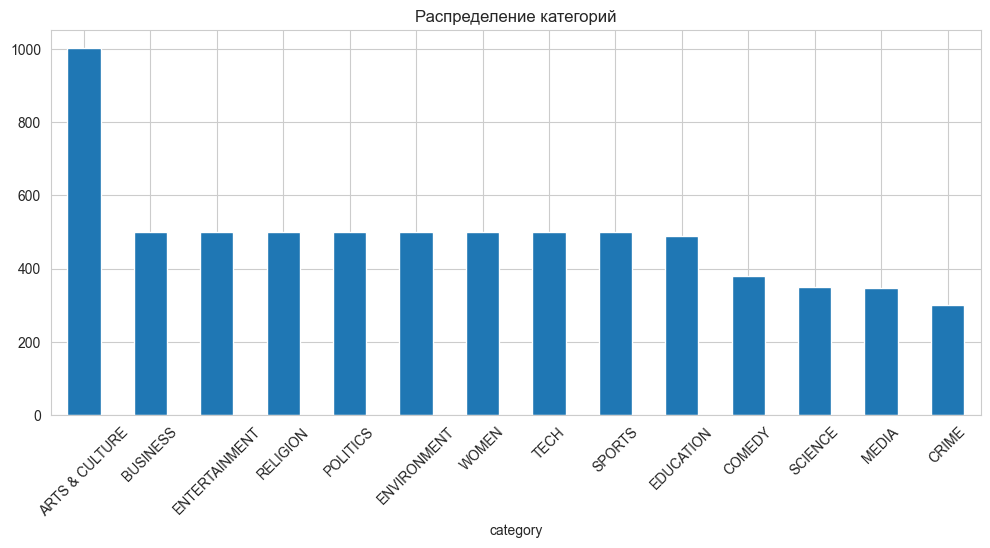

category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
RELIGION           501
POLITICS           501
ENVIRONMENT        501
WOMEN              501
TECH               501
SPORTS             501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64


In [15]:
plt.figure(figsize=(12,5))
df["category"].value_counts().plot(kind="bar")
plt.title("Распределение категорий")
plt.xticks(rotation=45)
plt.show()

print(df["category"].value_counts())


In [16]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

df.head()


,text,category,clean_text
0,Modeling Agencies Enabled Sexual Predators For...,ARTS & CULTURE,modeling agencies enabled sexual predators for...
1,Actor Jeff Hiller Talks “Bright Colors And Bol...,ARTS & CULTURE,actor jeff hiller talks bright colors and bold...
2,New Yorker Cover Puts Trump 'In The Hole' Afte...,ARTS & CULTURE,new yorker cover puts trump in the hole after ...
3,Man Surprises Girlfriend By Drawing Them In Di...,ARTS & CULTURE,man surprises girlfriend by drawing them in di...
4,This Artist Gives Renaissance-Style Sculptures...,ARTS & CULTURE,this artist gives renaissance style sculptures...


In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["category"]

print("Размер матрицы признаков:", X.shape)


Размер матрицы признаков: (6877, 5000)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (5501, 5000)
Test: (1376, 5000)


In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [20]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7696

Classification Report:

                precision    recall  f1-score   support

ARTS & CULTURE       0.76      0.90      0.82       201
      BUSINESS       0.66      0.67      0.66       100
        COMEDY       0.68      0.66      0.67        76
         CRIME       0.79      0.77      0.78        60
     EDUCATION       0.84      0.82      0.83        98
 ENTERTAINMENT       0.72      0.79      0.76       100
   ENVIRONMENT       0.79      0.82      0.80       100
         MEDIA       0.81      0.63      0.71        70
      POLITICS       0.77      0.75      0.76       100
      RELIGION       0.88      0.82      0.85       100
       SCIENCE       0.87      0.77      0.82        70
        SPORTS       0.88      0.83      0.86       100
          TECH       0.78      0.72      0.75       101
         WOMEN       0.62      0.64      0.63       100

      accuracy                           0.77      1376
     macro avg       0.78      0.76      0.76      1376
  we

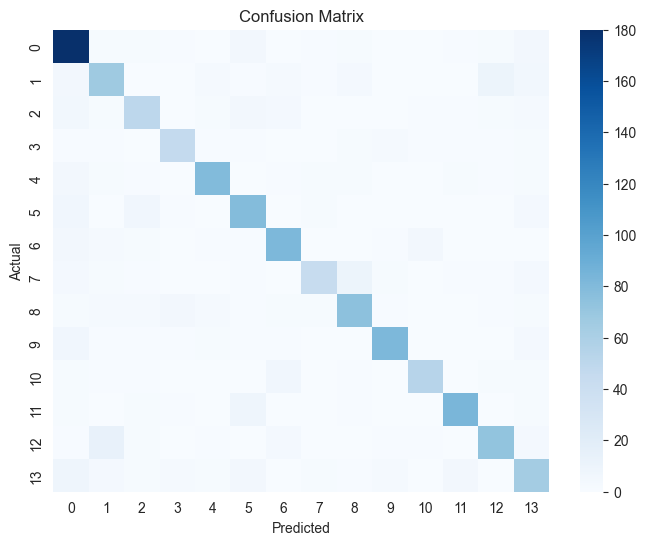

In [21]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
os.makedirs("../models", exist_ok=True)

joblib.dump(model, "../models/model1.pkl")
joblib.dump(vectorizer, "../models/vectorizer.pkl")

print("Модель и векторизатор сохранены в папке models/")


Модель и векторизатор сохранены в папке models/


In [23]:
from sklearn.svm import LinearSVC

vectorizer2 = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X2 = vectorizer2.fit_transform(df["clean_text"])
y2 = df["category"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

print("Новая матрица признаков:", X2.shape)


Новая матрица признаков: (6877, 10000)


In [24]:
model2 = LinearSVC()
model2.fit(X2_train, y2_train)


LinearSVC()

In [25]:
y2_pred = model2.predict(X2_test)

accuracy2 = accuracy_score(y2_test, y2_pred)

print("Accuracy улучшенной модели:", round(accuracy2,4))
print("\nClassification Report:\n")
print(classification_report(y2_test, y2_pred))


Accuracy улучшенной модели: 0.814

Classification Report:

                precision    recall  f1-score   support

ARTS & CULTURE       0.86      0.90      0.88       201
      BUSINESS       0.70      0.69      0.70       100
        COMEDY       0.73      0.72      0.73        76
         CRIME       0.79      0.80      0.79        60
     EDUCATION       0.82      0.86      0.84        98
 ENTERTAINMENT       0.83      0.78      0.80       100
   ENVIRONMENT       0.80      0.85      0.83       100
         MEDIA       0.81      0.80      0.81        70
      POLITICS       0.84      0.81      0.82       100
      RELIGION       0.91      0.87      0.89       100
       SCIENCE       0.86      0.86      0.86        70
        SPORTS       0.91      0.88      0.89       100
          TECH       0.79      0.76      0.77       101
         WOMEN       0.70      0.71      0.70       100

      accuracy                           0.81      1376
     macro avg       0.81      0.81      0.

In [26]:
print("Model 1 Accuracy:", round(accuracy,4))
print("Model 2 Accuracy:", round(accuracy2,4))


Model 1 Accuracy: 0.7696
Model 2 Accuracy: 0.814


In [27]:
joblib.dump(model2, "../models/model2.pkl")
joblib.dump(vectorizer2, "../models/vectorizer2.pkl")

print("Model2 сохранена.")


Model2 сохранена.
